# Objetivo

Demonstrar o uso de uma matriz de correlação

# Configurações

## Bilbiotecas

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

## Importando Dados

### FIIs, ETFs e BDRs

In [13]:
ativos = ['KNRI11.SA', 'ONEF11.SA', 'MXRF11.SA', 'XPLG11.SA', 
          'XPML11.SA', 'SMAL11.SA', 'IVVB11.SA', 'GOGL34.SA']

In [14]:
ativos = yf.download(ativos, start = '2017-01-01')['Adj Close']

[*********************100%***********************]  8 of 8 completed


In [16]:
ativos.head()

,GOGL34.SA,IVVB11.SA,KNRI11.SA,MXRF11.SA,ONEF11.SA,SMAL11.SA,XPLG11.SA,XPML11.SA
Date,,,,,,,,
2017-01-02,10.879166,78.639999,124.263588,7.419657,84.137840,54.000000,NaN,NaN
2017-01-03,10.934375,76.250000,124.184471,7.411427,84.318787,55.450001,NaN,NaN
2017-01-04,10.843750,75.940002,125.696960,7.478915,84.318787,56.990002,NaN,NaN
2017-01-05,10.834375,75.260002,125.749733,7.394144,83.233131,56.990002,NaN,NaN
2017-01-06,11.046875,76.300003,126.585106,7.407312,83.233131,56.500000,NaN,NaN


In [18]:
ativos.index = pd.to_datetime(ativos.index)

In [19]:
ativos.head()

,GOGL34.SA,IVVB11.SA,KNRI11.SA,MXRF11.SA,ONEF11.SA,SMAL11.SA,XPLG11.SA,XPML11.SA
Date,,,,,,,,
2017-01-02,10.879166,78.639999,124.263588,7.419657,84.137840,54.000000,NaN,NaN
2017-01-03,10.934375,76.250000,124.184471,7.411427,84.318787,55.450001,NaN,NaN
2017-01-04,10.843750,75.940002,125.696960,7.478915,84.318787,56.990002,NaN,NaN
2017-01-05,10.834375,75.260002,125.749733,7.394144,83.233131,56.990002,NaN,NaN
2017-01-06,11.046875,76.300003,126.585106,7.407312,83.233131,56.500000,NaN,NaN


### Moedas, índices e Criptomoedas

In [20]:
cesta = ['USDBRL=X', 'EURBRL=X', '^BVSP','^GSPC', 'BTC-USD', 'ETH-USD']

In [21]:
cesta = yf.download(cesta, start = '2017-01-01')['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [22]:
cesta.index = pd.to_datetime(cesta.index)

In [23]:
cesta.head()

,BTC-USD,ETH-USD,EURBRL=X,USDBRL=X,^BVSP,^GSPC
Date,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,NaN,NaN
2017-01-02,1021.750000,NaN,3.4190,3.2532,59589.0,NaN
2017-01-03,1043.839966,NaN,3.4320,3.2840,61814.0,2257.830078
2017-01-04,1154.729980,NaN,3.3976,3.2635,61589.0,2270.750000
2017-01-05,1013.380005,NaN,3.3732,3.2141,62071.0,2269.000000


In [44]:
cesta.rename(columns = {'USDBRL=X': 'Dolar',
                        'EURBRL=X': 'Euro',
                        '^BVSP': 'Ibov',
                        '^GSPC': 'S&P500',
                        'BTC-USD': 'Bitcoin',
                        'ETH-USD': 'Ethereum'}, inplace = True)

### Dados de ações

In [45]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'LREN3.SA', 'VALE3.SA', 'BPAC11.SA','OIBR3.SA']

In [46]:
acoes = yf.download(acoes, start = '2017-01-01')['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [47]:
acoes.index = pd.to_datetime(acoes.index)

In [48]:
acoes.head()

,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2017-01-02,NaN,16.774591,0.379203,19.702110,5.198050,15.886399,5.246079
2017-01-03,NaN,17.289278,0.378047,19.776739,5.495893,16.590065,5.510119
2017-01-04,NaN,17.137049,0.357915,19.552851,5.495893,16.292120,5.378099
2017-01-05,NaN,16.977564,0.370218,19.925997,5.584535,16.913376,5.364202
2017-01-06,NaN,16.781832,0.367832,20.000626,5.552623,16.463280,5.409367


## Juntar em um dataframe único

In [49]:
dfs = [ativos, cesta, acoes]

In [50]:
df_final = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'Date'),dfs)

In [51]:
df_final.head()

,GOGL34.SA,IVVB11.SA,KNRI11.SA,MXRF11.SA,ONEF11.SA,SMAL11.SA,XPLG11.SA,XPML11.SA,Bitcoin,Ethereum,...,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,10.879166,78.639999,124.263588,7.419657,84.137840,54.000000,NaN,NaN,1021.750000,NaN,...,3.2532,59589.0,NaN,NaN,16.774591,0.379203,19.702110,5.198050,15.886399,5.246079
2017-01-03,10.934375,76.250000,124.184471,7.411427,84.318787,55.450001,NaN,NaN,1043.839966,NaN,...,3.2840,61814.0,2257.830078,NaN,17.289278,0.378047,19.776739,5.495893,16.590065,5.510119
2017-01-04,10.843750,75.940002,125.696960,7.478915,84.318787,56.990002,NaN,NaN,1154.729980,NaN,...,3.2635,61589.0,2270.750000,NaN,17.137049,0.357915,19.552851,5.495893,16.292120,5.378099
2017-01-05,10.834375,75.260002,125.749733,7.394144,83.233131,56.990002,NaN,NaN,1013.380005,NaN,...,3.2141,62071.0,2269.000000,NaN,16.977564,0.370218,19.925997,5.584535,16.913376,5.364202
2017-01-06,11.046875,76.300003,126.585106,7.407312,83.233131,56.500000,NaN,NaN,902.200989,NaN,...,3.1977,61665.0,2276.979980,NaN,16.781832,0.367832,20.000626,5.552623,16.463280,5.409367


## Preparar os dados para a criação da matriz de correlação

In [52]:
retornos = df_final.pct_change()

In [53]:
retornos = retornos.dropna()

In [54]:
retornos.head()

,GOGL34.SA,IVVB11.SA,KNRI11.SA,MXRF11.SA,ONEF11.SA,SMAL11.SA,XPLG11.SA,XPML11.SA,Bitcoin,Ethereum,...,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-05,-0.013806,-0.006280,-0.000643,0.000000,-0.002877,0.026278,0.015137,0.021167,-0.013785,-0.013110,...,0.010985,0.008611,0.026212,-0.000166,0.031867,-0.017193,0.012048,0.031265,-0.018865,0.012100
2020-06-08,-0.015824,-0.011118,-0.002282,0.002740,0.001099,0.048149,0.009714,0.024276,0.010962,0.021092,...,-0.030818,0.031785,0.012042,0.095950,0.005002,0.049285,0.023810,0.019457,0.003113,0.033160
2020-06-09,0.016043,0.000888,-0.011730,-0.000911,-0.001372,-0.019207,0.003966,-0.004467,0.002478,-0.005678,...,-0.027805,-0.009197,-0.007799,-0.006664,-0.008440,0.000000,0.069767,-0.035952,0.003833,0.000219
2020-06-10,0.011053,0.008040,-0.005994,0.000912,0.000825,-0.033481,0.015466,0.010530,0.007595,0.010345,...,0.015928,-0.021303,-0.005313,-0.033852,-0.041903,0.035588,-0.010870,-0.014733,-0.014366,-0.017900
2020-06-12,-0.026271,-0.027623,-0.004955,-0.010018,-0.002816,-0.026611,-0.026571,-0.026821,-0.039437,-0.040218,...,0.015638,-0.019971,-0.046653,-0.005524,-0.020957,-0.010062,0.120879,-0.037383,-0.014760,-0.016448


# Matriz de Correlação

In [55]:
correlacao = retornos.corr()

In [56]:
correlacao

,GOGL34.SA,IVVB11.SA,KNRI11.SA,MXRF11.SA,ONEF11.SA,SMAL11.SA,XPLG11.SA,XPML11.SA,Bitcoin,Ethereum,...,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
GOGL34.SA,1.000000,0.670531,-0.035792,-0.042238,0.003676,0.012203,-0.011749,0.007010,0.194369,0.162896,...,0.000354,0.009101,0.542740,0.006417,-0.031251,0.021647,-0.083203,-0.035053,0.084224,0.073518
IVVB11.SA,0.670531,1.000000,-0.013333,-0.012873,-0.028783,-0.099718,-0.059885,0.034156,0.199236,0.200661,...,0.036307,-0.063827,0.613780,-0.067676,-0.111085,-0.039048,-0.036231,-0.080223,0.108551,0.002841
KNRI11.SA,-0.035792,-0.013333,1.000000,0.195874,0.035481,0.107393,0.248137,0.124631,0.039683,0.026662,...,-0.001402,0.090678,-0.003282,0.061945,0.070124,0.076337,0.091477,0.052320,0.006845,0.051062
MXRF11.SA,-0.042238,-0.012873,0.195874,1.000000,0.014673,0.053948,0.241981,0.175978,0.034523,0.007981,...,-0.044764,0.062705,0.025878,0.019418,-0.013820,0.013577,0.073491,0.059235,0.033235,0.021266
ONEF11.SA,0.003676,-0.028783,0.035481,0.014673,1.000000,0.087586,0.076815,0.044509,0.017650,0.017486,...,-0.008599,0.060311,0.009981,0.074128,0.052880,0.073770,0.067703,-0.033202,0.039517,0.017819
SMAL11.SA,0.012203,-0.099718,0.107393,0.053948,0.087586,1.000000,0.157215,0.167614,0.201611,0.152158,...,0.007817,0.835109,0.387487,0.687058,0.679673,0.562578,0.324761,0.432596,0.241294,0.426727
XPLG11.SA,-0.011749,-0.059885,0.248137,0.241981,0.076815,0.157215,1.000000,0.268157,0.034304,-0.013016,...,-0.028881,0.108673,0.046898,0.104878,0.091137,0.095564,0.088797,0.012330,0.005736,0.102176
XPML11.SA,0.007010,0.034156,0.124631,0.175978,0.044509,0.167614,0.268157,1.000000,0.120738,0.106118,...,-0.086640,0.163450,0.147091,0.087348,0.102509,0.129035,0.075918,0.149700,0.000662,0.139367
Bitcoin,0.194369,0.199236,0.039683,0.034523,0.017650,0.201611,0.034304,0.120738,1.000000,0.789315,...,0.040785,0.245652,0.371848,0.170258,0.097993,0.167554,0.122592,0.080924,0.213885,0.189448
Ethereum,0.162896,0.200661,0.026662,0.007981,0.017486,0.152158,-0.013016,0.106118,0.789315,1.000000,...,0.059567,0.188242,0.341373,0.142526,0.033377,0.107571,0.098322,0.090704,0.178301,0.142970


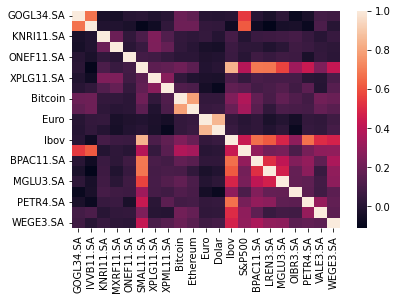

In [57]:
sns.heatmap(correlacao);

In [59]:
correlacao = correlacao.round(2)

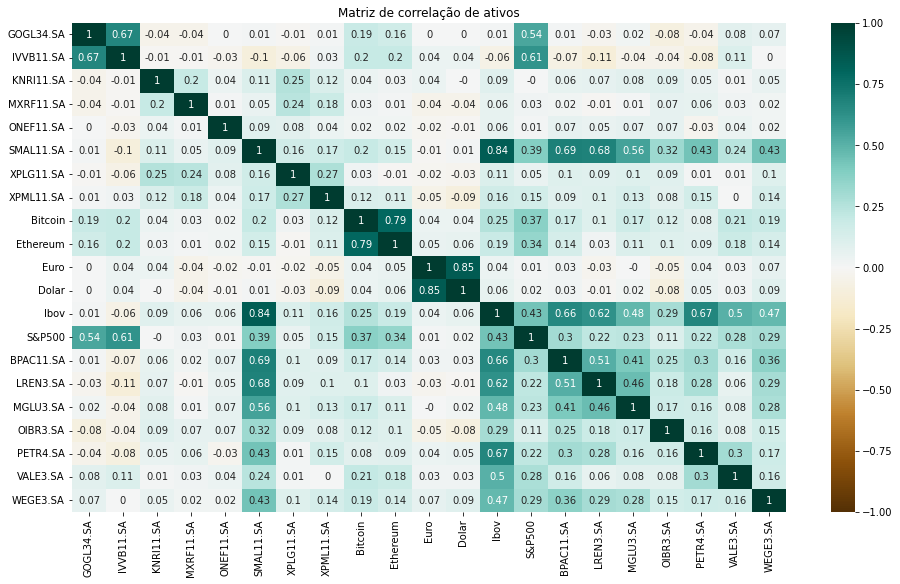

In [63]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao,
            vmin = -1, vmax = 1, annot = True, cmap = 'BrBG'
)
plt.title('Matriz de correlação de ativos')

plt.show();

## Explorando outros tipos de correlações

Para dados do mercado financeiro, como retornos sobre ações, índices, BDRs (Brazilian Depositary Receipts) e criptomoedas, a correlação de Pearson é frequentemente utilizada como a medida padrão para calcular a correlação. No entanto, a escolha do tipo de correlação ideal depende das características dos dados e dos objetivos da análise. Aqui estão algumas considerações:

1. **Correlação de Pearson**:
   - *Quando Usar*: A correlação de Pearson é adequada quando você está interessado em medir a relação linear entre duas variáveis contínuas. É amplamente utilizado em análises financeiras, pois assume que os dados seguem uma distribuição normal.
   - *Vantagens*: É sensível a relações lineares claras e tem interpretação direta. É amplamente conhecido e amplamente utilizado na área financeira.
   - *Limitações*: A correlação de Pearson não leva em consideração relações não lineares e pode ser sensível a outliers.

2. **Correlação de Spearman**:
   - *Quando Usar*: A correlação de Spearman é uma opção adequada quando você não tem certeza de que a relação entre as variáveis é linear. Ela calcula a correlação com base nas classificações dos dados, não em seus valores brutos.
   - *Vantagens*: É robusta a outliers e pode detectar relações monotônicas, mesmo que não sejam lineares.
   - *Limitações*: Pode ser menos sensível a relações lineares claras.

3. **Correlação de Kendall**:
   - *Quando Usar*: A correlação de Kendall é útil quando você está interessado em medir a concordância entre as classificações de duas variáveis. Ela também é não paramétrica e útil quando você não assume uma relação linear.
   - *Vantagens*: Boa para detectar relações monotônicas e é robusta a outliers.
   - *Limitações*: Pode ser computacionalmente mais intensiva para grandes conjuntos de dados.

Em resumo, a escolha entre essas medidas de correlação depende de suas suposições sobre a natureza dos dados. Se você acredita que as relações são principalmente lineares e os dados seguem uma distribuição normal, a correlação de Pearson é a escolha típica. No entanto, se você está preocupado com relações não lineares, outliers ou não quer fazer suposições sobre a distribuição dos dados, a correlação de Spearman ou Kendall pode ser mais apropriada.

Além disso, em análises financeiras, é importante lembrar que a correlação não implica causalidade, e a diversificação de carteira é uma técnica comum usada para reduzir o risco, independentemente da correlação entre ativos.


In [65]:
correlacao_pearson = retornos.corr(method='pearson') #correlação padrão da função
correlacao_kendall = retornos.corr(method='kendall')
correlacao_spearman = retornos.corr(method='spearman')

In [66]:
correlacao_pearson = correlacao_pearson.round(2)
correlacao_kendall = correlacao_kendall.round(2)
correlacao_spearman = correlacao_spearman.round(2)

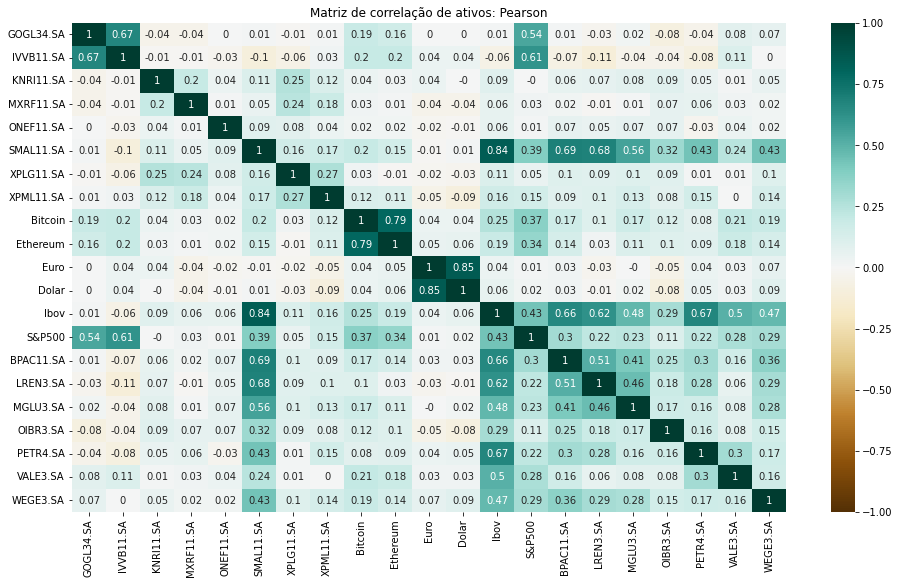

In [67]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao_pearson,
            vmin = -1, vmax = 1, annot = True, cmap = 'BrBG'
)
plt.title('Matriz de correlação de ativos: Pearson')

plt.show();

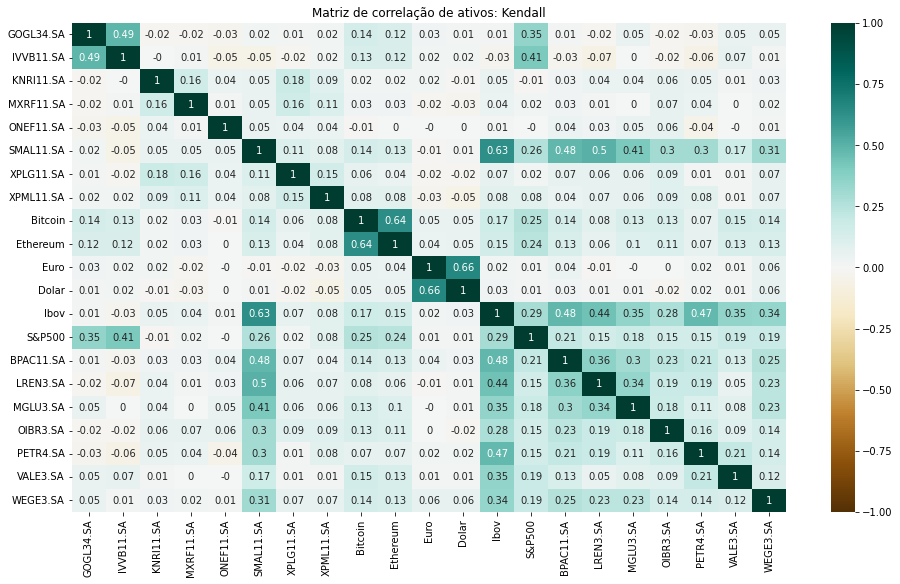

In [68]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao_kendall,
            vmin = -1, vmax = 1, annot = True, cmap = 'BrBG'
)
plt.title('Matriz de correlação de ativos: Kendall')

plt.show();

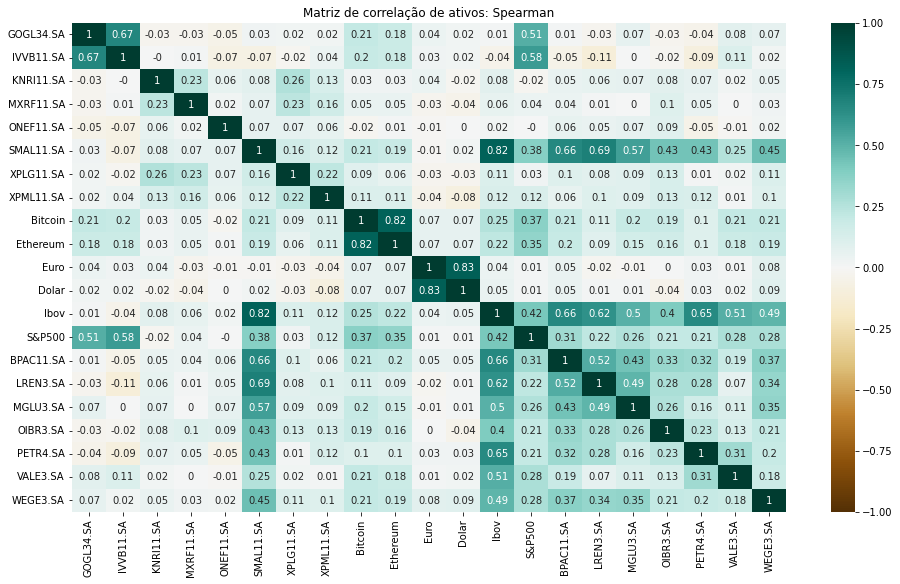

In [69]:
plt.figure(figsize = (16,9))

sns.heatmap(correlacao_spearman,
            vmin = -1, vmax = 1, annot = True, cmap = 'BrBG'
)
plt.title('Matriz de correlação de ativos: Spearman')

plt.show();

## Diferenças entre as correlações

### Peason vs Kendall

In [72]:
pearson_kendall = correlacao_pearson - correlacao_kendall

In [73]:
pearson_kendall

,GOGL34.SA,IVVB11.SA,KNRI11.SA,MXRF11.SA,ONEF11.SA,SMAL11.SA,XPLG11.SA,XPML11.SA,Bitcoin,Ethereum,...,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
GOGL34.SA,0.00,0.18,-0.02,-0.02,0.03,-0.01,-0.02,-0.01,0.05,0.04,...,-0.01,0.00,0.19,0.00,-0.01,-0.03,-0.06,-0.01,0.03,0.02
IVVB11.SA,0.18,0.00,-0.01,-0.02,0.02,-0.05,-0.04,0.01,0.07,0.08,...,0.02,-0.03,0.20,-0.04,-0.04,-0.04,-0.02,-0.02,0.04,-0.01
KNRI11.SA,-0.02,-0.01,0.00,0.04,0.00,0.06,0.07,0.03,0.02,0.01,...,0.01,0.04,0.01,0.03,0.03,0.04,0.03,0.00,0.00,0.02
MXRF11.SA,-0.02,-0.02,0.04,0.00,0.00,0.00,0.08,0.07,0.00,-0.02,...,-0.01,0.02,0.01,-0.01,-0.02,0.01,0.00,0.02,0.03,0.00
ONEF11.SA,0.03,0.02,0.00,0.00,0.00,0.04,0.04,0.00,0.03,0.02,...,-0.01,0.05,0.01,0.03,0.02,0.02,0.01,0.01,0.04,0.01
SMAL11.SA,-0.01,-0.05,0.06,0.00,0.04,0.00,0.05,0.09,0.06,0.02,...,0.00,0.21,0.13,0.21,0.18,0.15,0.02,0.13,0.07,0.12
XPLG11.SA,-0.02,-0.04,0.07,0.08,0.04,0.05,0.00,0.12,-0.03,-0.05,...,-0.01,0.04,0.03,0.03,0.03,0.04,0.00,0.00,0.00,0.03
XPML11.SA,-0.01,0.01,0.03,0.07,0.00,0.09,0.12,0.00,0.04,0.03,...,-0.04,0.08,0.07,0.05,0.03,0.07,-0.01,0.07,-0.01,0.07
Bitcoin,0.05,0.07,0.02,0.00,0.03,0.06,-0.03,0.04,0.00,0.15,...,-0.01,0.08,0.12,0.03,0.02,0.04,-0.01,0.01,0.06,0.05
Ethereum,0.04,0.08,0.01,-0.02,0.02,0.02,-0.05,0.03,0.15,0.00,...,0.01,0.04,0.10,0.01,-0.03,0.01,-0.01,0.02,0.05,0.01


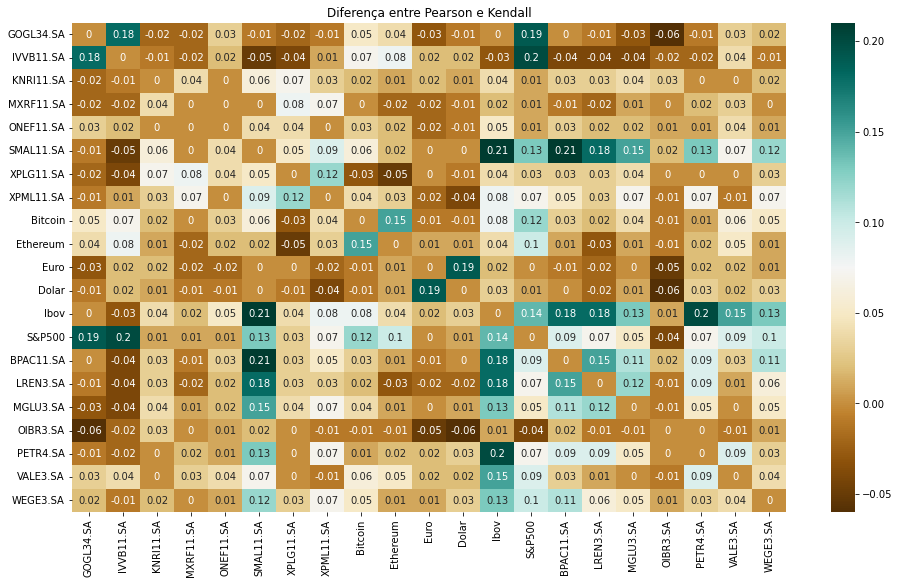

In [76]:
plt.figure(figsize = (16,9))

sns.heatmap(pearson_kendall,
            annot = True, cmap = 'BrBG'
)
plt.title('Diferença entre Pearson e Kendall')

plt.show();

Temos como destaque a forte diferença entre Peason e Kendall nos ativos SMALL11.SA-Ibov, SMALL11.SA-BPAC11.SA, PETR4.SA-Ibov, IVVB11.SA-S&P500.
A variação negativa de diferença teve uma escala muito menor comparada à positiva, o que indica na correlação de Pearson esses ativos tiveram uma correlação mais forte que na de Kendall.

Uma diferença positiva ao comparar a correlação de Pearson com a correlação de Kendall (ou seja, Pearson - Kendall > 0) para ativos específicos pode ser interpretada da seguinte forma:

1. **Sensibilidade a Outliers**: A correlação de Pearson é sensível a outliers, enquanto a correlação de Kendall é menos afetada por valores extremos. Portanto, uma diferença positiva pode indicar que a presença de outliers está afetando a correlação de Pearson, fazendo com que ela seja mais alta do que a correlação de Kendall.

2. **Relação Linear**: A correlação de Pearson mede especificamente a relação linear entre variáveis, enquanto a correlação de Kendall avalia a concordância nas classificações das observações. Portanto, uma diferença positiva pode sugerir que a relação entre os ativos é mais próxima de uma relação linear do que de uma relação monotônica.

3. **Assunções de Normalidade**: A correlação de Pearson pressupõe que os dados sigam uma distribuição normal, enquanto a correlação de Kendall é não paramétrica e não faz essa suposição. Se os dados não seguem uma distribuição normal, a correlação de Pearson pode ser distorcida, resultando em uma diferença positiva.

4. **Variações Locais**: A diferença positiva pode indicar que em certos intervalos ou subconjuntos de dados, a relação entre os ativos é mais linear do que em outros. Isso pode ser relevante se você estiver analisando dados financeiros em diferentes períodos ou contextos.

Em resumo, uma diferença positiva entre a correlação de Pearson e a correlação de Kendall sugere que a relação entre os ativos em questão pode ser mais linear e sensível a outliers.


### Pearson vs Spearman

In [77]:
pearson_spearman = correlacao_pearson - correlacao_spearman

In [78]:
pearson_spearman

,GOGL34.SA,IVVB11.SA,KNRI11.SA,MXRF11.SA,ONEF11.SA,SMAL11.SA,XPLG11.SA,XPML11.SA,Bitcoin,Ethereum,...,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
GOGL34.SA,0.00,0.00,-0.01,-0.01,0.05,-0.02,-0.03,-0.01,-0.02,-0.02,...,-0.02,0.00,0.03,0.00,0.00,-0.05,-0.05,0.00,0.00,0.00
IVVB11.SA,0.00,0.00,-0.01,-0.02,0.04,-0.03,-0.04,-0.01,0.00,0.02,...,0.02,-0.02,0.03,-0.02,0.00,-0.04,-0.02,0.01,0.00,-0.02
KNRI11.SA,-0.01,-0.01,0.00,-0.03,-0.02,0.03,-0.01,-0.01,0.01,0.00,...,0.02,0.01,0.02,0.01,0.01,0.01,0.01,-0.02,-0.01,0.00
MXRF11.SA,-0.01,-0.02,-0.03,0.00,-0.01,-0.02,0.01,0.02,-0.02,-0.04,...,0.00,0.00,-0.01,-0.02,-0.02,0.01,-0.03,0.01,0.03,-0.01
ONEF11.SA,0.05,0.04,-0.02,-0.01,0.00,0.02,0.01,-0.02,0.04,0.01,...,-0.01,0.04,0.01,0.01,0.00,0.00,-0.02,0.02,0.05,0.00
SMAL11.SA,-0.02,-0.03,0.03,-0.02,0.02,0.00,0.00,0.05,-0.01,-0.04,...,-0.01,0.02,0.01,0.03,-0.01,-0.01,-0.11,0.00,-0.01,-0.02
XPLG11.SA,-0.03,-0.04,-0.01,0.01,0.01,0.00,0.00,0.05,-0.06,-0.07,...,0.00,0.00,0.02,0.00,0.01,0.01,-0.04,0.00,-0.01,-0.01
XPML11.SA,-0.01,-0.01,-0.01,0.02,-0.02,0.05,0.05,0.00,0.01,0.00,...,-0.01,0.04,0.03,0.03,0.00,0.04,-0.05,0.03,-0.01,0.04
Bitcoin,-0.02,0.00,0.01,-0.02,0.04,-0.01,-0.06,0.01,0.00,-0.03,...,-0.03,0.00,0.00,-0.04,-0.01,-0.03,-0.07,-0.02,0.00,-0.02
Ethereum,-0.02,0.02,0.00,-0.04,0.01,-0.04,-0.07,0.00,-0.03,0.00,...,-0.01,-0.03,-0.01,-0.06,-0.06,-0.04,-0.06,-0.01,0.00,-0.05


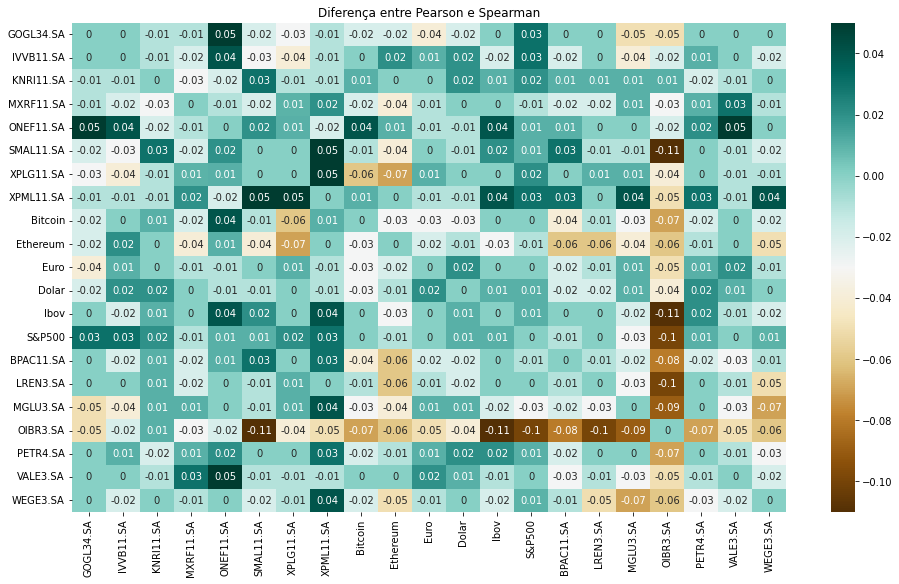

In [80]:
plt.figure(figsize = (16,9))

sns.heatmap(pearson_spearman,
            annot = True, cmap = 'BrBG'
)
plt.title('Diferença entre Pearson e Spearman')

plt.show();

Na diferença entre Pearson e Spearman, temos destaque para outros pares de ativos, esses pares são diferentes dos encontrados na diferença entre Pearson e Spearman.

Uma diferença menor entre a correlação de Pearson e a correlação de Spearman, com a maior variação negativa chegando a -0.1 e a maior variação positiva atingindo apenas 0.04, sugere algumas considerações interessantes:

1. **Relação Linear**: A correlação de Pearson é mais sensível a relações lineares claras entre as variáveis. Se a diferença entre Pearson e Spearman é pequena, isso pode indicar que a relação entre os ativos é predominantemente linear. Em outras palavras, as variações nos retornos dos ativos estão mais alinhadas de forma linear.

2. **Robustez a Outliers**: A correlação de Spearman é menos sensível a outliers do que a correlação de Pearson. A diferença negativa de -0.1 pode ser devido à presença de outliers que afetaram a correlação de Pearson mais significativamente do que a correlação de Spearman.

3. **Não Linearidades Leves**: A diferença positiva de 0.04 pode sugerir que, embora a relação geral seja linear, pode haver algumas não linearidades leves na relação entre os ativos que a correlação de Pearson não captura, mas a correlação de Spearman consegue identificar em certo grau.

4. **Importância Contextual**: Lembre-se de que a interpretação da diferença entre essas correlações deve levar em consideração o contexto dos seus dados e o que é mais relevante para sua análise financeira específica. A diferença, mesmo que pequena, pode ter implicações significativas dependendo dos seus objetivos e das decisões que você pretende tomar com base nas correlações.

Em resumo, uma diferença menor entre a correlação de Pearson e a correlação de Spearman sugere que a relação entre os ativos pode ser principalmente linear, mas pode haver algumas nuances não lineares leves ou a presença de outliers que afetam a correlação de Pearson de forma mais notável.

### Kendall vs Spearman

In [81]:
kendall_spearman = correlacao_kendall - correlacao_spearman

In [82]:
kendall_spearman

,GOGL34.SA,IVVB11.SA,KNRI11.SA,MXRF11.SA,ONEF11.SA,SMAL11.SA,XPLG11.SA,XPML11.SA,Bitcoin,Ethereum,...,Dolar,Ibov,S&P500,BPAC11.SA,LREN3.SA,MGLU3.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
GOGL34.SA,0.00,-0.18,0.01,0.01,0.02,-0.01,-0.01,0.00,-0.07,-0.06,...,-0.01,0.00,-0.16,0.00,0.01,-0.02,0.01,0.01,-0.03,-0.02
IVVB11.SA,-0.18,0.00,0.00,0.00,0.02,0.02,0.00,-0.02,-0.07,-0.06,...,0.00,0.01,-0.17,0.02,0.04,0.00,0.00,0.03,-0.04,-0.01
KNRI11.SA,0.01,0.00,0.00,-0.07,-0.02,-0.03,-0.08,-0.04,-0.01,-0.01,...,0.01,-0.03,0.01,-0.02,-0.02,-0.03,-0.02,-0.02,-0.01,-0.02
MXRF11.SA,0.01,0.00,-0.07,0.00,-0.01,-0.02,-0.07,-0.05,-0.02,-0.02,...,0.01,-0.02,-0.02,-0.01,0.00,0.00,-0.03,-0.01,0.00,-0.01
ONEF11.SA,0.02,0.02,-0.02,-0.01,0.00,-0.02,-0.03,-0.02,0.01,-0.01,...,0.00,-0.01,0.00,-0.02,-0.02,-0.02,-0.03,0.01,0.01,-0.01
SMAL11.SA,-0.01,0.02,-0.03,-0.02,-0.02,0.00,-0.05,-0.04,-0.07,-0.06,...,-0.01,-0.19,-0.12,-0.18,-0.19,-0.16,-0.13,-0.13,-0.08,-0.14
XPLG11.SA,-0.01,0.00,-0.08,-0.07,-0.03,-0.05,0.00,-0.07,-0.03,-0.02,...,0.01,-0.04,-0.01,-0.03,-0.02,-0.03,-0.04,0.00,-0.01,-0.04
XPML11.SA,0.00,-0.02,-0.04,-0.05,-0.02,-0.04,-0.07,0.00,-0.03,-0.03,...,0.03,-0.04,-0.04,-0.02,-0.03,-0.03,-0.04,-0.04,0.00,-0.03
Bitcoin,-0.07,-0.07,-0.01,-0.02,0.01,-0.07,-0.03,-0.03,0.00,-0.18,...,-0.02,-0.08,-0.12,-0.07,-0.03,-0.07,-0.06,-0.03,-0.06,-0.07
Ethereum,-0.06,-0.06,-0.01,-0.02,-0.01,-0.06,-0.02,-0.03,-0.18,0.00,...,-0.02,-0.07,-0.11,-0.07,-0.03,-0.05,-0.05,-0.03,-0.05,-0.06


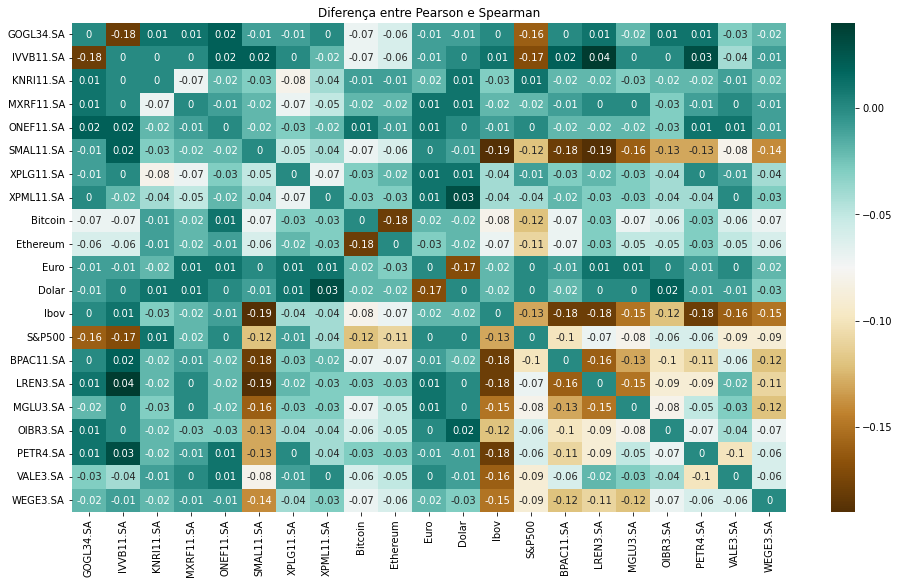

In [83]:
plt.figure(figsize = (16,9))

sns.heatmap(kendall_spearman,
            annot = True, cmap = 'BrBG'
)
plt.title('Diferença entre Pearson e Spearman')

plt.show();

Na comparação entre as correlações de Kendall e Spearman, com a maior diferença negativa atingindo -0.15 e a maior diferença positiva alcançando apenas 0.02, algumas conclusões podem ser inferidas:

1. **Similaridade nas Classificações**: Tanto Kendall quanto Spearman são métodos não paramétricos que avaliam a concordância nas classificações das observações. O fato de as diferenças serem relativamente pequenas sugere que, em geral, as classificações dos ativos são semelhantes.

2. **Robustez a Outliers**: Ambos os métodos são menos sensíveis a outliers em comparação com a correlação de Pearson. A maior diferença negativa de -0.15 pode indicar que outliers negativos estão influenciando mais a correlação de Kendall do que a de Spearman.

3. **Diferenças em Relações Monotônicas**: A diferença positiva de 0.02 sugere que, em algumas situações, a correlação de Spearman pode ser ligeiramente mais sensível a relações monotônicas do que a correlação de Kendall.

4. **Importância Contextual**: Como sempre, é importante considerar o contexto dos seus dados e os objetivos da análise. Mesmo pequenas diferenças podem ter implicações significativas dependendo das decisões financeiras que você pretende tomar.

Em resumo, a diferença entre as correlações de Kendall e Spearman com a maior variação negativa em -0.15 e a maior variação positiva em 0.02 sugere que, em geral, as classificações dos ativos são semelhantes, mas pode haver diferenças sutis na sensibilidade a outliers e nas relações monotônicas.